# 1D Regression with a Single Neuron

We'll implement a script to regress 1D data using a single neuron.

## Load Data

We load the data using the function `load_data()` contained in `loader.py`.

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_1d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-0.79053779]
 [-1.39344279]
 [-0.37787242]
 [-1.10111982]
 [-1.27358957]
 [-0.2643897 ]
 [ 0.44140346]
 [ 0.42640938]
 [-0.15272506]
 [-0.00933567]]
y_gt: [[-0.2952689 ]
 [-0.59672139]
 [-0.08893621]
 [-0.45055991]
 [-0.53679478]
 [-0.03219485]
 [ 0.32070173]
 [ 0.31320469]
 [ 0.02363747]
 [ 0.09533216]]


## Visualize Data

We visualize the data using the function `plot_data_1d()` contained in `plotting.py`.

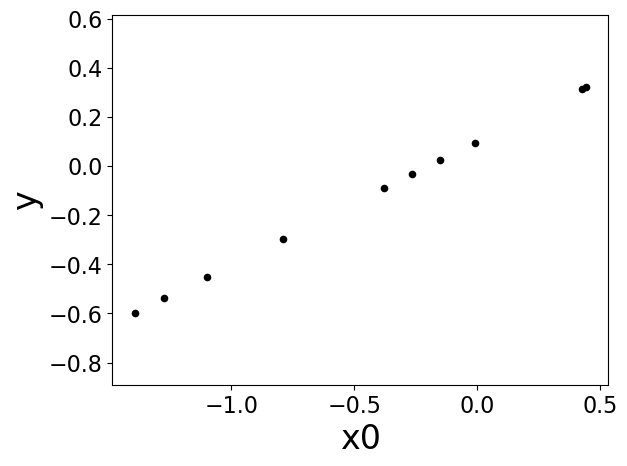

In [2]:
from plotting import plot_data_1d

plot_data_1d(x, y_gt)

## Neuron

We now create a single neuron with one scalar weigth `w0` and one input `x` (which can be a scalar or a vector corresponding to multiple inputs) ...

In [3]:
def neuron_reg_1d(w0, x):
    return w0 * x

... randomly initialize its weight ...

In [4]:
from numpy.random import default_rng

rng = default_rng()

w0 = rng.standard_normal()

... and obtain its predition `y_p` for the input data (which has the same shape as `x`).

In [5]:
y_p = neuron_reg_1d(w0, x)

## Visualize Predictions by Randomly Initialized Neuron

We now plot its predictions using the function `plot_pred_1d` from `plotting.py`.

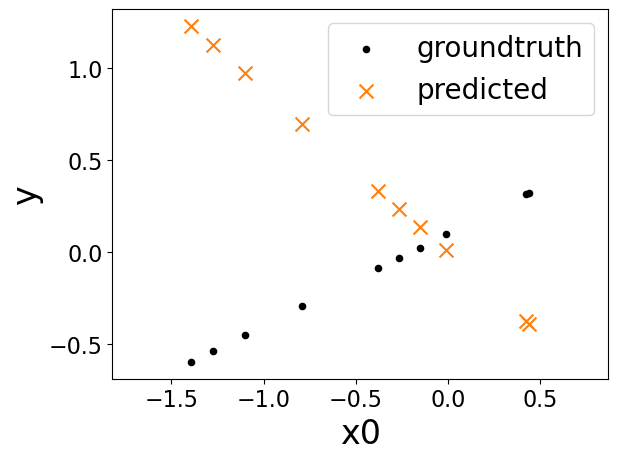

In [6]:

from plotting import plot_pred_1d

plot_pred_1d(x, y_gt, y_p)


## Training

We now train the neuron...

In [7]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # learning rate

for i in range(num_train_iterations):
	selected = rng.integers(0, num_samples) # select random sample
	x0_selected = x[selected]
	y_gt_selected = y_gt[selected]

	y_p_selected = neuron_reg_1d(w0, x0_selected) # neuron prediction
	
	error = y_p_selected - y_gt_selected # calculate error

	w0 -= eta * error * x0_selected # update neuron weight

	print(f"i={i} w0={w0[0]:.2f} error={error[0]:.2f}")

i=0 w0=-0.80 error=0.99
i=1 w0=-0.60 error=1.56
i=2 w0=-0.54 error=0.77
i=3 w0=-0.49 error=0.72
i=4 w0=-0.34 error=1.15
i=5 w0=-0.32 error=-0.46
i=6 w0=-0.30 error=-0.45
i=7 w0=-0.18 error=0.92
i=8 w0=-0.06 error=0.85
i=9 w0=-0.05 error=-0.34
i=10 w0=0.01 error=0.50
i=11 w0=0.02 error=-0.32
i=12 w0=0.04 error=0.28
i=13 w0=0.12 error=0.54
i=14 w0=0.12 error=0.04
i=15 w0=0.17 error=0.39
i=16 w0=0.18 error=-0.25
i=17 w0=0.22 error=0.31
i=18 w0=0.23 error=0.12
i=19 w0=0.24 error=0.12
i=20 w0=0.24 error=-0.03
i=21 w0=0.26 error=0.19
i=22 w0=0.27 error=-0.21
i=23 w0=0.27 error=-0.10
i=24 w0=0.27 error=-0.20
i=25 w0=0.30 error=0.21
i=26 w0=0.31 error=-0.19
i=27 w0=0.31 error=-0.10
i=28 w0=0.32 error=-0.18
i=29 w0=0.32 error=-0.10
i=30 w0=0.33 error=-0.18
i=31 w0=0.33 error=-0.10
i=32 w0=0.34 error=0.09
i=33 w0=0.34 error=-0.08
i=34 w0=0.34 error=-0.17
i=35 w0=0.34 error=-0.10
i=36 w0=0.35 error=0.02
i=37 w0=0.35 error=0.02
i=38 w0=0.35 error=-0.06
i=39 w0=0.36 error=0.10
i=40 w0=0.36 error=-0

... and plot its performance, again using the function `plot_pred_1d` from `plotting.py`.

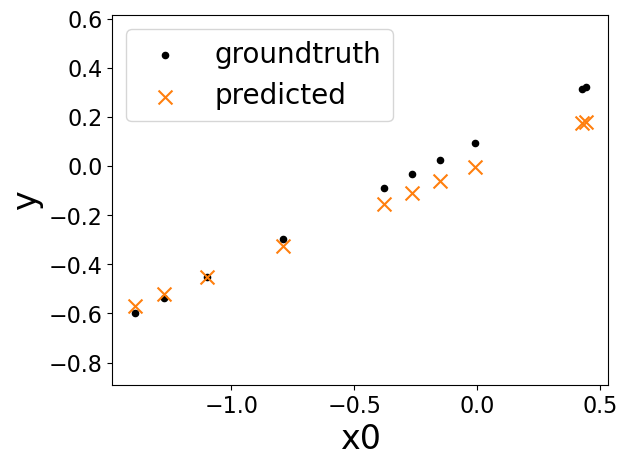

In [8]:
plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x))

## Testing

We now check how the trained neuron works on the test data.

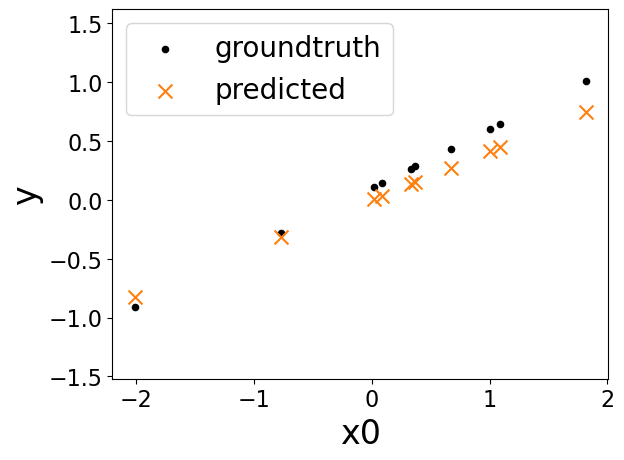

In [9]:
(x_test, y_gt_test) = load_data(filename="data_reg_1d_clean_test.csv")

plot_pred_1d(x_test, y_gt_test, y_p=neuron_reg_1d(w0, x_test))